# Example 1: Basic Phylogeny Reconstruction

This example demonstrates the standard PICASSO workflow using the built-in example dataset.

## Setup and Data Loading

In [2]:
import picasso
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load example CNA data
character_matrix = picasso.load_data()
print(f'Dataset: {character_matrix.shape[0]} cells × {character_matrix.shape[1]} features')

# Examine the data structure
print("Data range:", character_matrix.min().min(), "to", character_matrix.max().max())
print("First few rows:")
print(character_matrix.head())

Dataset: 10000 cells × 116 features
Data range: -2 to 2
First few rows:
                                 chr01:115902745-118644250  \
RA19_10_21_FACs:121887344154339                         -1   
RA19_10_21_FACs:126347847362331                          0   
RA19_10_21_FACs:241038729046940                          0   
RA19_10_21_FACs:230681442675422                          0   
RA19_10_21_FACs:240135605479845                          0   

                                 chr01:131500-5928100  \
RA19_10_21_FACs:121887344154339                     0   
RA19_10_21_FACs:126347847362331                     0   
RA19_10_21_FACs:241038729046940                     0   
RA19_10_21_FACs:230681442675422                     0   
RA19_10_21_FACs:240135605479845                     0   

                                 chr01:13368000-16803650  \
RA19_10_21_FACs:121887344154339                        0   
RA19_10_21_FACs:126347847362331                        0   
RA19_10_21_FACs:241038729046940 

## Data Visualization

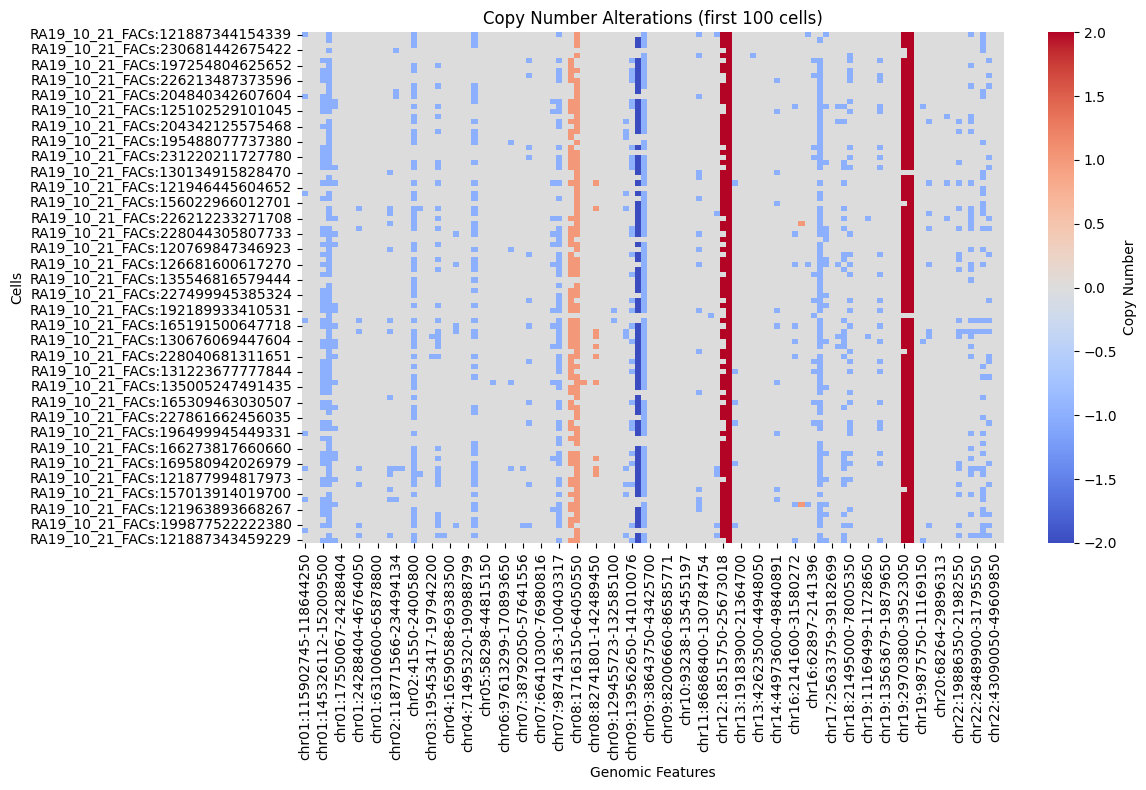

In [6]:
# Visualize the CNA data as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(character_matrix.iloc[:100],
            cmap='coolwarm', center=0,
            cbar_kws={'label': 'Copy Number'})
plt.title('Copy Number Alterations (first 100 cells)')
plt.xlabel('Genomic Features')
plt.ylabel('Cells')
plt.tight_layout()
plt.show()

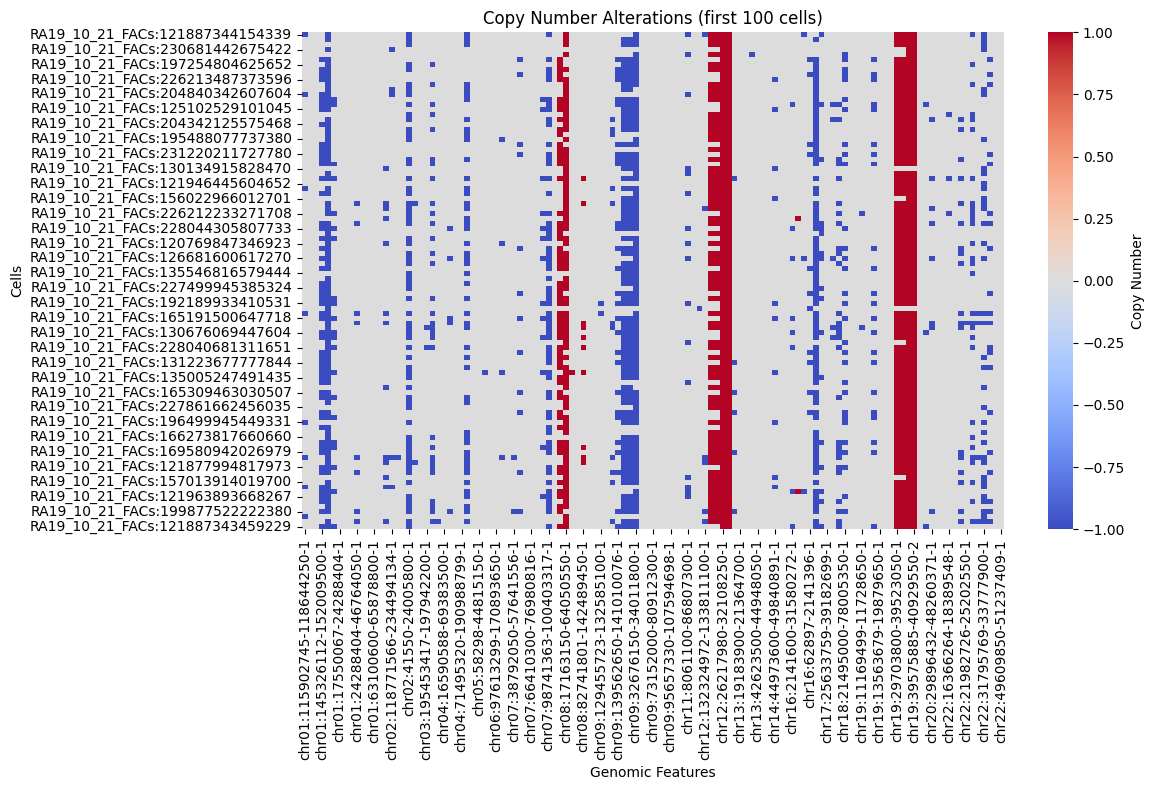

In [18]:
# Encode complex CNAs as ternary values for better similarity handling
character_matrix = picasso.encode_cnvs_as_ternary(character_matrix)
# Visualize the CNA data as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(character_matrix.iloc[:100],
            cmap='coolwarm', center=0,
            cbar_kws={'label': 'Copy Number'})
plt.title('Copy Number Alterations (first 100 cells)')
plt.xlabel('Genomic Features')
plt.ylabel('Cells')
plt.tight_layout()
plt.show()

## Basic Phylogenetic Reconstruction

In [ ]:
# Initialize PICASSO with standard parameters
model = picasso.Picasso(
    character_matrix,
    min_clone_size=5,
    assignment_confidence_threshold=0.8,
    assignment_confidence_proportion=0.9
)

# Fit the model
print("Reconstructing phylogeny...")
model.fit()

# Extract results
phylogeny = model.get_phylogeny()
clone_assignments = model.get_clone_assignments()

print(f"Reconstructed phylogeny with {len(phylogeny.get_leaves())} terminal clones")

Tree Depth 1: 1 clone(s), 0 terminal clone(s). Force Split: False


Reconstructing phylogeny...


100%|██████████| 1/1 [00:01<00:00,  1.57s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 2/2 [00:01<00:00,  1.36it/s]
Tree Depth 3: 4 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 4/4 [00:02<00:00,  1.53it/s]
Tree Depth 4: 8 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 8/8 [00:02<00:00,  3.50it/s]
Tree Depth 5: 15 clone(s), 1 terminal clone(s). Force Split: False
100%|██████████| 15/15 [00:02<00:00,  5.69it/s]
Tree Depth 6: 28 clone(s), 2 terminal clone(s). Force Split: False
100%|██████████| 28/28 [00:03<00:00,  9.12it/s]
Tree Depth 7: 53 clone(s), 3 terminal clone(s). Force Split: False
100%|██████████| 53/53 [00:04<00:00, 13.00it/s]
Tree Depth 8: 94 clone(s), 12 terminal clone(s). Force Split: False
100%|██████████| 94/94 [00:04<00:00, 19.10it/s]
Tree Depth 9: 151 clone(s), 37 terminal clone(s). Force Split: False
100%|██████████| 151/151 [00:05<00:00, 29.07it/s]
Tree Depth 10: 227 clone(s), 75 termin

Reconstructed phylogeny with 365 terminal clones
Clone size distribution:
clone_id
1-1-1-1-STOP            1624
1-1-0-0-0-STOP           852
1-0-1-0-0-0-STOP         520
1-1-1-0-1-1-1-0-STOP     513
1-1-1-0-0-0-0-1-STOP     363
Name: count, dtype: int64


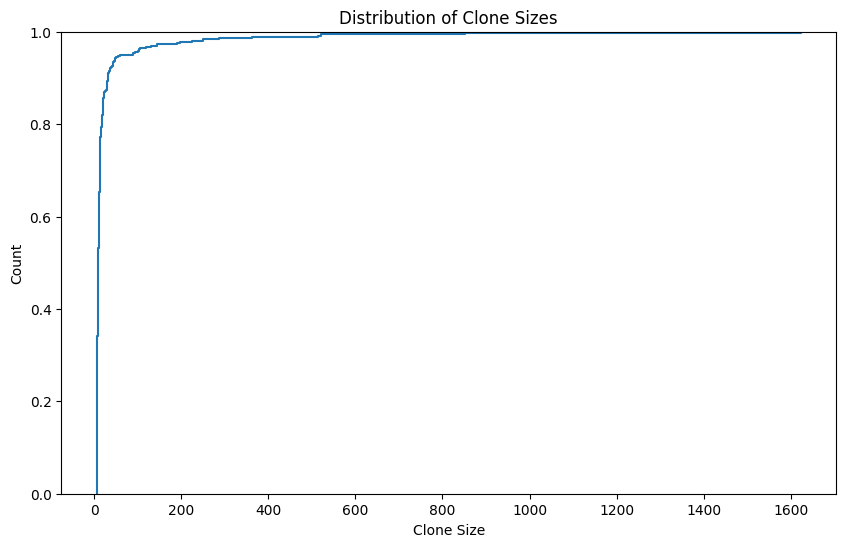

In [10]:
# Plot the distribution of clone sizes
plt.figure(figsize=(10, 6))
sns.ecdfplot(clone_assignments['clone_id'].value_counts())
plt.title('Distribution of Clone Sizes')
plt.xlabel('Clone Size')
plt.ylabel('Count')
plt.show()

In [ ]:
# We can also use BIC-based termination; we can see that for small data, it may terminate with less resolved clones.
model = picasso.Picasso(
    character_matrix,
    min_clone_size=5,
    terminate_by='BIC'
)

# Fit the model
print("Reconstructing phylogeny...")
model.fit()

# Extract results
phylogeny = model.get_phylogeny()
clone_assignments = model.get_clone_assignments()

print(f"Reconstructed phylogeny with {len(phylogeny.get_leaves())} terminal clones")
print(f"Clone size distribution:")
print(clone_assignments['clone_id'].value_counts().head())

Tree Depth 1: 1 clone(s), 0 terminal clone(s). Force Split: False


Reconstructing phylogeny...


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 2/2 [00:01<00:00,  1.59it/s]
Tree Depth 3: 4 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 4/4 [00:02<00:00,  1.99it/s]
Tree Depth 4: 8 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 8/8 [00:01<00:00,  4.28it/s]
Tree Depth 5: 13 clone(s), 3 terminal clone(s). Force Split: False
100%|██████████| 13/13 [00:01<00:00,  6.58it/s]
Tree Depth 6: 16 clone(s), 10 terminal clone(s). Force Split: False
100%|██████████| 16/16 [00:00<00:00, 17.20it/s]
All leaf nodes have been terminated.
PICASSO algorithm finished in 9.41 seconds.


Reconstructed phylogeny with 16 terminal clones
Clone size distribution:
clone_id
1-0-1-0-STOP        1613
1-0-1-1-0-STOP      1432
1-1-1-0-STOP        1100
1-0-0-0-0-STOP       856
1-0-1-1-1-0-STOP     777
Name: count, dtype: int64


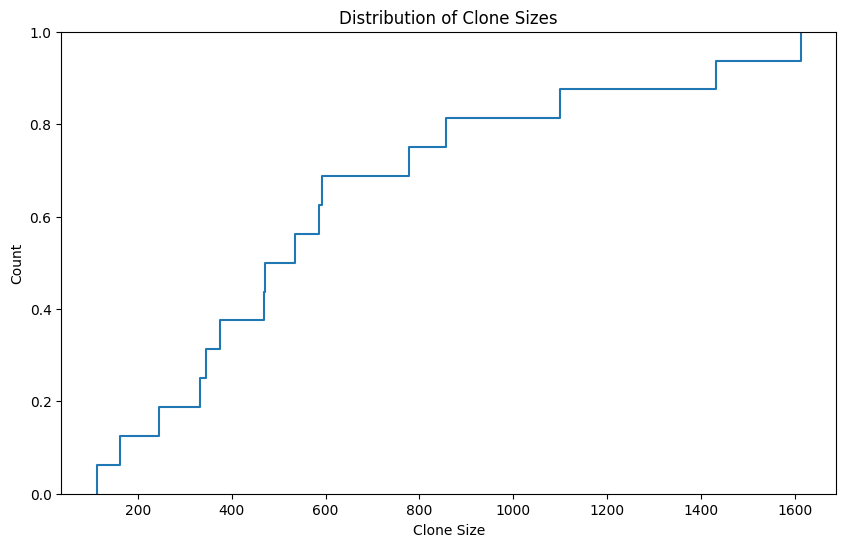

In [12]:
# Plot the distribution of clone sizes
plt.figure(figsize=(10, 6))
sns.ecdfplot(clone_assignments['clone_id'].value_counts())
plt.title('Distribution of Clone Sizes')
plt.xlabel('Clone Size')
plt.ylabel('Count')
plt.show()

## Tree Analysis & Downstream Visualization

Initialized CloneTree with 16 clones and 10000 samples.
Tree rooted at clone: 1-1-0-0-0-STOP


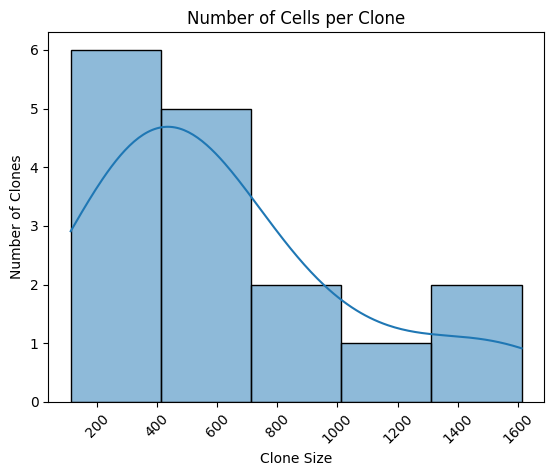

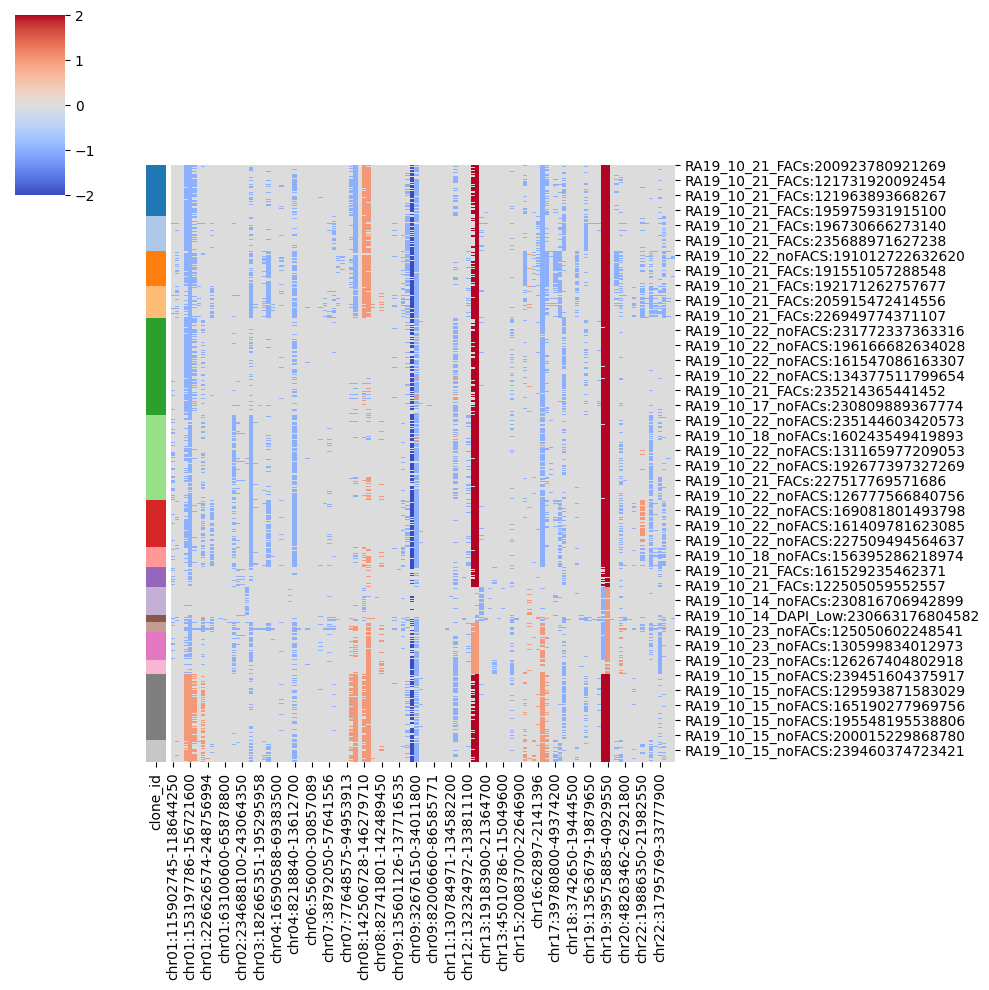

In [16]:
# Create CloneTree for advanced analysis
tree = picasso.CloneTree(phylogeny, clone_assignments, character_matrix)

# Root the tree at the most ancestral clone
outgroup = tree.get_most_ancestral_clone()
tree.root_tree(outgroup)
print(f"Tree rooted at clone: {outgroup}")

# Generate visualizations showing the clones and their groupings (not phylogenetic structure)
tree.plot_clone_sizes()
tree.plot_alterations()



In [17]:
# Get clone phylogeny as Newick string for external tools 
clone_tree = tree.get_clone_phylogeny()
print("Newick format (first 100 characters):")
print(clone_tree.write()[:100] + "...")

Newick format (first 100 characters):
(1-1-0-0-0-STOP:0.5,((((1-1-0-0-1-1-STOP:1)1:1,(1-1-0-0-1-0-STOP:1)1:1)1:1,(((1-1-0-1-1-STOP:1)1:1,(...


# Example 2: Filtering Very Noisy scRNA-seq Data

In [19]:
# Load data
character_matrix = picasso.load_data()

# Encode complex CNAs as ternary values for better similarity handling
encoded_matrix = picasso.encode_cnvs_as_ternary(character_matrix)
print(f'Original: {character_matrix.shape[1]} features')
print(f'Encoded: {encoded_matrix.shape[1]} features')

Original: 116 features
Encoded: 121 features


## Feature Filtering for Noise Reduction & Performance Improvements

In [21]:
# Use encoded data for noisy data handling
data = encoded_matrix

# Remove features with very low variance (uninformative)
print(f'Features before filtering: {data.shape[1]}')

# Calculate modal proportion for each feature
modal_proportions = (data.values == data.mode(axis=0).values).mean(axis=0)

# Keep features where <99% of cells have the modal value
informative_features = modal_proportions < 0.99
filtered_data = data.loc[:, informative_features]

print(f'Features after filtering: {filtered_data.shape[1]}')
print(f'Removed {data.shape[1] - filtered_data.shape[1]} uninformative features')

Features before filtering: 121
Features after filtering: 69
Removed 52 uninformative features


## Conservative Parameter Settings

In [24]:
# Use conservative parameters for noisy data
model = picasso.Picasso(
    filtered_data,
    min_depth=2,                    # Force minimum depth to explore structure
    max_depth=12,                   # Limit depth to prevent overfitting
    min_clone_size=50,              # Larger clones for noise robustness
    terminate_by='BIC',             # Use conservative BIC-based termination
    bic_penalty_strength=1.2        # Stronger penalty against complexity
)

print("Fitting model with conservative parameters...")
model.fit()

# Analyze results
phylogeny = model.get_phylogeny()
clone_assignments = model.get_clone_assignments()

print(f"Conservative approach: {len(phylogeny.get_leaves())} clones")
print("Clone size distribution:")
print(clone_assignments['clone_id'].value_counts().describe())

Tree Depth 1: 1 clone(s), 0 terminal clone(s). Force Split: True


Fitting model with conservative parameters...


100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
Tree Depth 2: 2 clone(s), 0 terminal clone(s). Force Split: True
100%|██████████| 2/2 [00:00<00:00,  2.28it/s]
Tree Depth 3: 4 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 4/4 [00:01<00:00,  3.21it/s]
Tree Depth 4: 8 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 8/8 [00:02<00:00,  3.76it/s]
Tree Depth 5: 16 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 16/16 [00:02<00:00,  6.00it/s]
Tree Depth 6: 28 clone(s), 4 terminal clone(s). Force Split: False
100%|██████████| 28/28 [00:02<00:00, 10.22it/s]
Tree Depth 7: 36 clone(s), 20 terminal clone(s). Force Split: False
100%|██████████| 36/36 [00:01<00:00, 25.03it/s]
All leaf nodes have been terminated.
PICASSO algorithm finished in 12.03 seconds.


Conservative approach: 36 clones
Clone size distribution:
count     36.000000
mean     277.777778
std      150.833136
min       78.000000
25%      179.500000
50%      241.000000
75%      352.750000
max      910.000000
Name: count, dtype: float64


# Example 3: Advanced Tree Analysis with CloneTree Class

This example shows how we can extract the clone phylogeny from PICASSO. 

In [25]:
# Start with a fitted model (from previous examples)
data = picasso.load_data()
model = picasso.Picasso(data, min_clone_size=10)
model.fit()

# Create CloneTree with modal aggregation
tree = picasso.CloneTree(
    model.get_phylogeny(),
    model.get_clone_assignments(),
    data,
    clone_aggregation='mode'  # Use modal values for clone profiles
)

# Root the tree
outgroup = tree.get_most_ancestral_clone()
tree.root_tree(outgroup)
print(f"Tree rooted at: {outgroup}")

Tree Depth 1: 1 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 1/1 [00:02<00:00,  2.29s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 2/2 [00:02<00:00,  1.11s/it]
Tree Depth 3: 4 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 4/4 [00:02<00:00,  1.55it/s]
Tree Depth 4: 8 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 8/8 [00:02<00:00,  2.88it/s]
Tree Depth 5: 16 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
Tree Depth 6: 32 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 32/32 [00:04<00:00,  7.17it/s]
Tree Depth 7: 63 clone(s), 1 terminal clone(s). Force Split: False
100%|██████████| 63/63 [00:05<00:00, 11.22it/s]
Tree Depth 8: 116 clone(s), 10 terminal clone(s). Force Split: False
100%|██████████| 116/116 [00:07<00:00, 16.05it/s]
Tree Depth 9: 190 clone(s), 42 terminal clone(s). Force Split: False
100%|██████████| 19

Initialized CloneTree with 413 clones and 10000 samples.
Tree rooted at: 1-0-0-1-0-0-0-1-STOP


## Clone Profiles 
We can examine the overall CNA profile that characterizes the clone.

Modal profiles shape: (413, 116)


/Users/spersad/.local/share/mamba/envs/test_picasso/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x800 with 0 Axes>

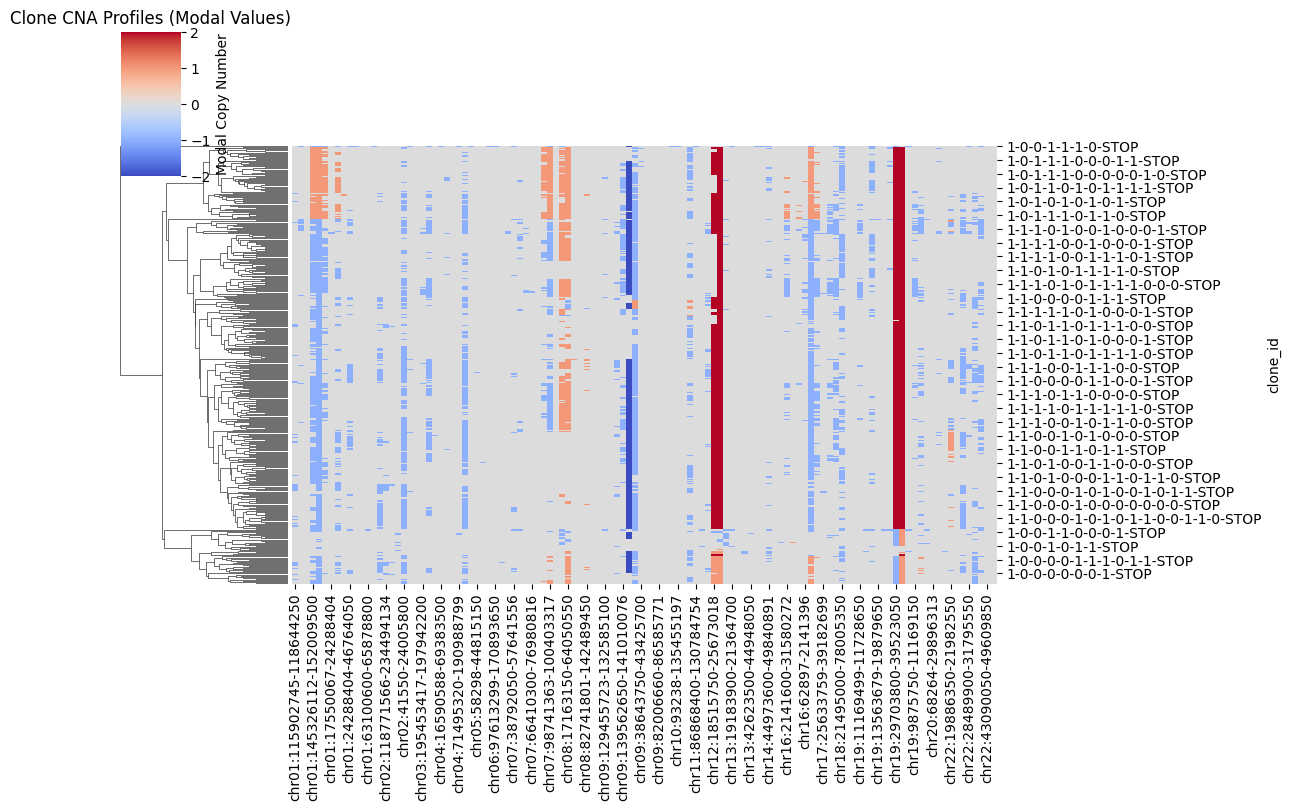

/Users/spersad/.local/share/mamba/envs/test_picasso/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x800 with 0 Axes>

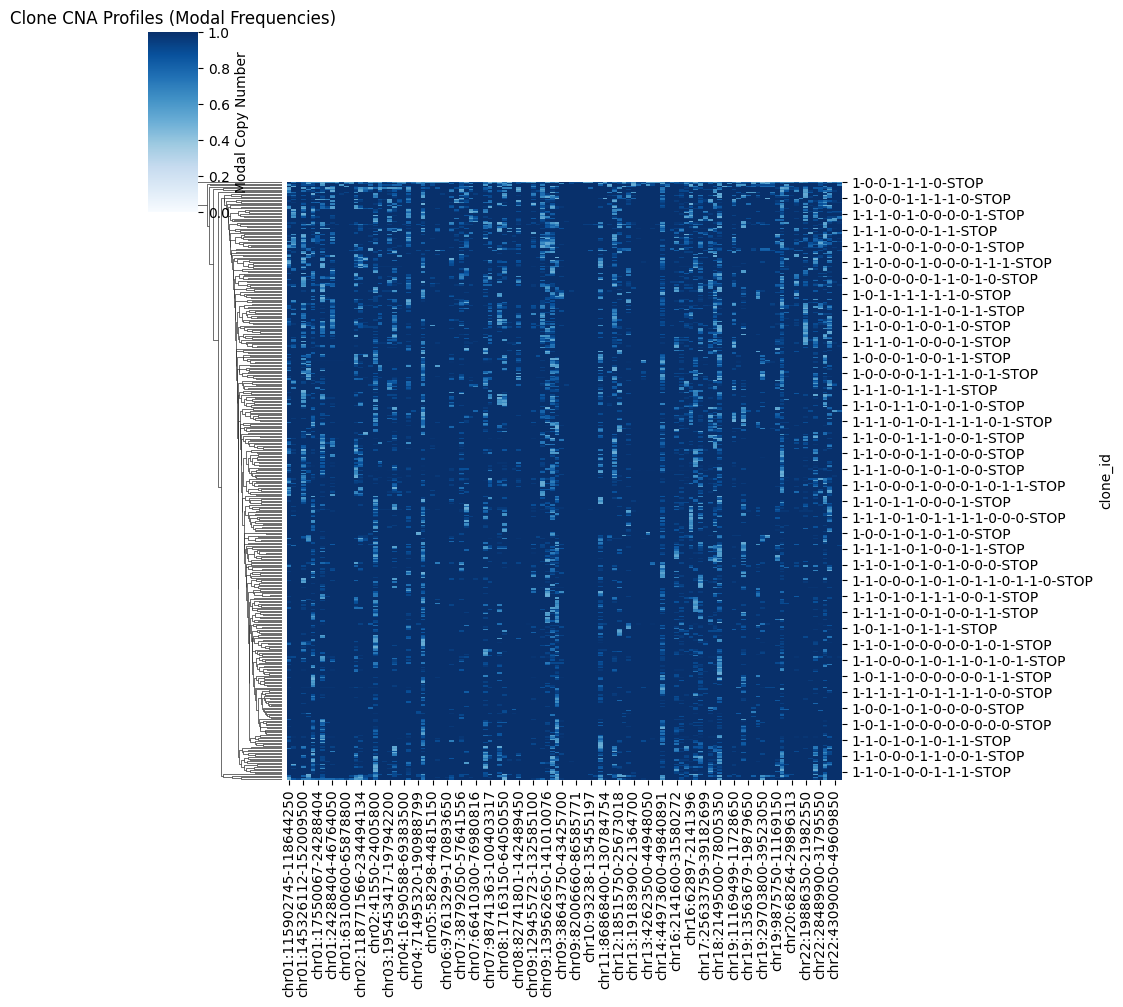

In [37]:
import numpy as np
# Get modal CNA profiles for each clone
modal_profiles, modal_frequencies = tree.get_modal_clone_profiles()
print(f"Modal profiles shape: {modal_profiles.shape}")

# Visualize clone profiles
plt.figure(figsize=(12, 8))
sns.clustermap(modal_profiles,
               cmap='coolwarm', center=0,
               figsize=(12, 8),
               cbar_kws={'label': 'Modal Copy Number'},
               col_cluster=False)
plt.title('Clone CNA Profiles (Modal Values)')
plt.show()

# Visualize the frequencies of the modal values to get a sense of how noisy the leaves are.
plt.figure(figsize=(12, 8))
sns.clustermap(modal_frequencies,
            cmap='Blues', vmin=0,
            cbar_kws={'label': 'Modal Copy Number'},
            col_cluster=False)
plt.title('Clone CNA Profiles (Modal Frequencies)')
plt.show()

In [ ]:
# Create sample-level phylogeny (may be large as it contains all cells)
print("Creating sample phylogeny...")
sample_tree = tree.get_sample_phylogeny()
print(f"Sample tree has {len(sample_tree.get_leaves())} leaves")

# For visualization, we'll work with clone tree
clone_phylogeny = tree.get_clone_phylogeny()

# Tree statistics
print(f"Clone tree depth: {clone_phylogeny.get_farthest_leaf()[1]}")
print(f"Number of internal nodes: {len(clone_phylogeny.get_descendants()) - len(clone_phylogeny.get_leaves())}")


Creating sample phylogeny...
Added 10000 leaves to the tree.
Sample tree has 10000 leaves
Clone tree depth: 23.5
Number of internal nodes: 824


# Example 4: iTOL Export for Figures

iTOL is a sophisticated visualization tool for phylogenies. This example shows how to create publication-ready visualizations using iTOL and helper functions to assist in visualization of the PICASSO tree.

In [39]:
# Prepare data
data = picasso.load_data()
model = picasso.Picasso(data, min_clone_size=15)
model.fit()

tree = picasso.CloneTree(model.get_phylogeny(),
                        model.get_clone_assignments(),
                        data)
outgroup = tree.get_most_ancestral_clone()
tree.root_tree(outgroup)

# Get cell-level tree for iTOL (use clone tree if too large)
cell_tree = tree.get_sample_phylogeny()
newick_string = cell_tree.write()

# Save tree file for iTOL
with open('cell_phylogeny.nwk', 'w') as f:
    f.write(newick_string)

print("Saved phylogeny to cell_phylogeny.nwk")

Tree Depth 1: 1 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
Tree Depth 2: 2 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 2/2 [00:01<00:00,  1.10it/s]
Tree Depth 3: 4 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 4/4 [00:02<00:00,  1.94it/s]
Tree Depth 4: 8 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 8/8 [00:01<00:00,  4.29it/s]
Tree Depth 5: 16 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 16/16 [00:03<00:00,  5.08it/s]
Tree Depth 6: 32 clone(s), 0 terminal clone(s). Force Split: False
100%|██████████| 32/32 [00:03<00:00,  8.93it/s]
Tree Depth 7: 63 clone(s), 1 terminal clone(s). Force Split: False
100%|██████████| 63/63 [00:05<00:00, 11.18it/s]
Tree Depth 8: 113 clone(s), 13 terminal clone(s). Force Split: False
100%|██████████| 113/113 [00:06<00:00, 17.31it/s]
Tree Depth 9: 182 clone(s), 44 terminal clone(s). Force Split: False
100%|██████████| 18

Initialized CloneTree with 309 clones and 10000 samples.
Added 10000 leaves to the tree.
Saved phylogeny to cell_phylogeny.nwk


## CNA Heatmap Annotation

In [ ]:
# Create heatmap annotation showing CNA profiles
heatmap_annotation = picasso.itol_utils.dataframe_to_itol_heatmap(
    data,
    dataset_label="Copy Number Alterations",
    color_min='#053061',  # Dark blue for deletions
    color_max='#67001f'   # Dark red for amplifications
)

# Save annotation file
with open('cna_heatmap.txt', 'w') as f:
    f.write(heatmap_annotation)

print("Saved CNA heatmap annotation to cna_heatmap.txt")
print("First few lines:")
print('\\n'.join(heatmap_annotation.split('\\n')[:10]))

Saved CNA heatmap annotation to cna_heatmap.txt
First few lines:
DATASET_HEATMAP
SEPARATOR SPACE
DATASET_LABEL Copy Number Alterations
FIELD_LABELS chr01:115902745-118644250 chr01:131500-5928100 chr01:13368000-16803650 chr01:145326112-152009500 chr01:153197786-156721600 chr01:157095900-223815700 chr01:17550067-24288404 chr01:223971718-226626277 chr01:226626574-248756994 chr01:24288404-46764050 chr01:46767650-57159500 chr01:57159650-63100450 chr01:63100600-65878800 chr01:65886318-115902556 chr01:6592377-12443150 chr02:118771566-234494134 chr02:234688100-243064350 chr02:24005946-118771400 chr02:41550-24005800 chr03:1637564-29738400 chr03:182665351-195295958 chr03:195453417-197942200 chr03:29738500-60716037 chr03:60716214-182665193 chr04:16590588-69383500 chr04:3076600-8218550 chr04:53050-2954011 chr04:71495320-190988799 chr04:8218840-13612700 chr05:140627650-180700437 chr05:58298-44815150 chr05:78322334-140166800 chr06:556000-30857089 chr06:97613299-170893650 chr07:100686287-112579550 ch

## Metadata Color Strips

In [ ]:
# Create sample metadata for demonstration
clone_assignments = model.get_clone_assignments()

# Simulate tissue sites
np.random.seed(42)  # For reproducibility
sites = np.random.choice(['Primary', 'Metastasis_1', 'Metastasis_2', 'Normal'],
                        size=len(clone_assignments))
sites_series = pd.Series(sites, index=clone_assignments.index, name='Tissue_Site')

# Define color mapping
site_colors = {
    'Primary': '#e41a1c',
    'Metastasis_1': '#377eb8',
    'Metastasis_2': '#4daf4a',
    'Normal': '#984ea3'
}

# Create color strip annotation
colorstrip_annotation = picasso.itol_utils.dataframe_to_itol_colorstrip(
    sites_series,
    site_colors,
    dataset_label='Tissue Site'
)

with open('tissue_sites.txt', 'w') as f:
    f.write(colorstrip_annotation)

print("Saved tissue site annotation to tissue_sites.txt")

## Clone Composition Stacked Bars

In [ ]:
# Analyze tissue composition within each clone
clone_tissue_data = clone_assignments.merge(sites_series,
                                           left_index=True,
                                           right_index=True)

# Calculate proportions of each tissue type within each clone
site_proportions = (clone_tissue_data.groupby('clone_id')['Tissue_Site']
                    .value_counts(normalize=True)
                    .unstack(fill_value=0))

print("Tissue proportions by clone:")
print(site_proportions.head())

# Create stacked bar annotation for clone tree
stackedbar_annotation = picasso.itol_utils.dataframe_to_itol_stackedbar(
    site_proportions,
    site_colors,
    dataset_label='Tissue Composition'
)

with open('clone_composition.txt', 'w') as f:
    f.write(stackedbar_annotation)

print("Saved clone composition annotation to clone_composition.txt")

## iTOL Workflow

In [42]:
print("\n" + "="*50)
print("ITOL VISUALIZATION WORKFLOW")
print("="*50)
print()
print("Files created for iTOL:")
print("1. cell_phylogeny.nwk - Main phylogenetic tree")
print("2. cna_heatmap.txt - CNA profile heatmap")
print("3. tissue_sites.txt - Tissue site color strips")
print("4. clone_composition.txt - Clone composition stacked bars")
print()
print("Steps for iTOL visualization:")
print("1. Go to https://itol.embl.de/")
print("2. Upload cell_phylogeny.nwk")
print("3. Drag and drop annotation files to add visualizations")
print("4. Customize colors, labels, and layout")
print("5. Export high-resolution figures")
print()
print("Pro tip: Use clone tree instead of cell tree for large datasets")
print("         to improve iTOL performance and readability")


ITOL VISUALIZATION WORKFLOW

Files created for iTOL:
1. cell_phylogeny.nwk - Main phylogenetic tree
2. cna_heatmap.txt - CNA profile heatmap
3. tissue_sites.txt - Tissue site color strips
4. clone_composition.txt - Clone composition stacked bars

Steps for iTOL visualization:
1. Go to https://itol.embl.de/
2. Upload cell_phylogeny.nwk
3. Drag and drop annotation files to add visualizations
4. Customize colors, labels, and layout
5. Export high-resolution figures

Pro tip: Use clone tree instead of cell tree for large datasets
         to improve iTOL performance and readability
